# Introduction to pandas

## BrainHack Global 2018 Leipzig  

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import pylab as pl

In [2]:
# creating some fake data (numpy arrays)
np.random.seed(0)
Nobs = 5
floats = np.random.rand(Nobs)
print(floats)
integers = np.random.randint(1, 100, Nobs)
print(integers)
subjects = ['Anna', 'Bob', 'Charlie', 'Donald', 'Eric']

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[22 37 88 71 89]


### Series 

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index

In [3]:
s1 = pd.Series(floats)

In [4]:
s1 

0    0.548814
1    0.715189
2    0.602763
3    0.544883
4    0.423655
dtype: float64

In [5]:
s2 = pd.Series(integers, index=subjects)

In [6]:
s2

Anna       22
Bob        37
Charlie    88
Donald     71
Eric       89
dtype: int64

In [7]:
s3 = pd.Series(5, index=subjects)

In [8]:
s3

Anna       5
Bob        5
Charlie    5
Donald     5
Eric       5
dtype: int64

In [9]:
s4 = pd.Series(integers, dtype=np.float32)

In [10]:
s4

0    22.0
1    37.0
2    88.0
3    71.0
4    89.0
dtype: float32

In [11]:
dict1 = {0: 1., 1: 2., 3: 3.}

In [12]:
s5 = pd.Series(dict1)

In [13]:
s5

0    1.0
1    2.0
3    3.0
dtype: float64

In [14]:
s6 = pd.Series(dict1, index=subjects)

In [15]:
s6

Anna      NaN
Bob       NaN
Charlie   NaN
Donald    NaN
Eric      NaN
dtype: float64

In [16]:
s7 = pd.Series(dict1, index=range(5))

In [17]:
s7

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
dtype: float64

In [18]:
s7.dropna()

0    1.0
1    2.0
3    3.0
dtype: float64

In [19]:
s2

Anna       22
Bob        37
Charlie    88
Donald     71
Eric       89
dtype: int64

In [20]:
# To avoid
s2[1] 

37

In [21]:
# indexing by index
s2.loc['Bob']

37

In [22]:
# indexing by index position
s2.iloc[1]

37

In [23]:
s2[1:3]

Bob        37
Charlie    88
dtype: int64

In [24]:
s2.loc['Bob':'Donald']

Bob        37
Charlie    88
Donald     71
dtype: int64

In [25]:
np.exp(s1)

0    1.731198
1    2.044574
2    1.827161
3    1.724407
4    1.527534
dtype: float64

In [26]:
np.exp(s2)

Anna       3.584913e+09
Bob        1.171914e+16
Charlie    1.651636e+38
Donald     6.837671e+30
Eric       4.489613e+38
dtype: float64

In [27]:
s2.reindex([0, 'Bob', 'A'])

0       NaN
Bob    37.0
A       NaN
dtype: float64

In [28]:
s1[1:] + s1[:-1]

0         NaN
1    1.430379
2    1.205527
3    1.089766
4         NaN
dtype: float64

In [29]:
s = pd.Series(floats, index=subjects, name='Float', dtype=np.float64)

In [30]:
s

Anna       0.548814
Bob        0.715189
Charlie    0.602763
Donald     0.544883
Eric       0.423655
Name: Float, dtype: float64

In [31]:
kind = ['line', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie']

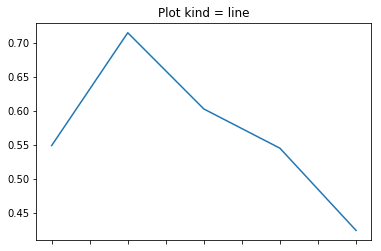

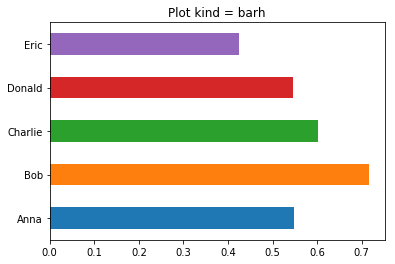

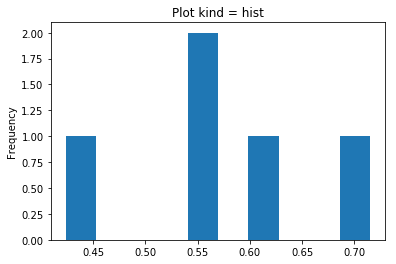

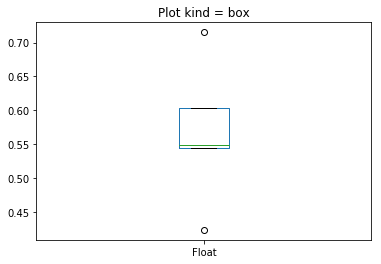

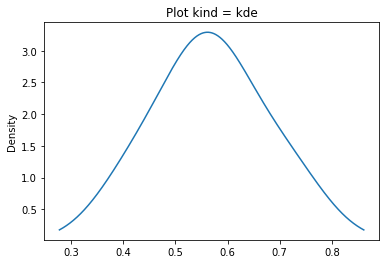

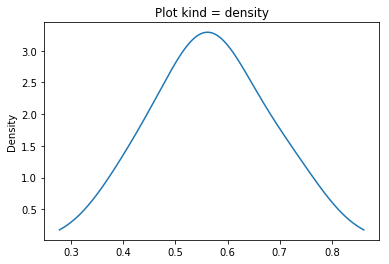

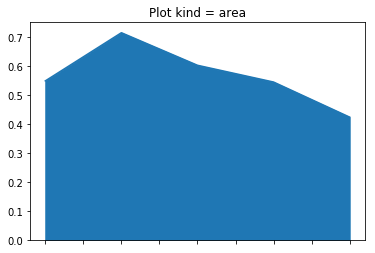

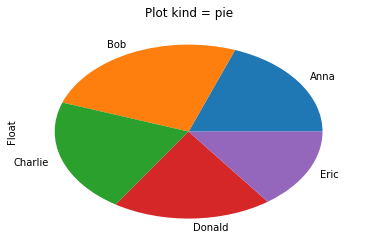

In [32]:
for k in kind:
    pl.figure()
    pl.title('Plot kind = {}'.format(k))
    s.plot(kind=k)
    

In [33]:
r = pd.date_range(start='19990113', end='20180503', freq='400D')

In [34]:
r

DatetimeIndex(['1999-01-13', '2000-02-17', '2001-03-23', '2002-04-27',
               '2003-06-01', '2004-07-05', '2005-08-09', '2006-09-13',
               '2007-10-18', '2008-11-21', '2009-12-26', '2011-01-30',
               '2012-03-05', '2013-04-09', '2014-05-14', '2015-06-18',
               '2016-07-22', '2017-08-26'],
              dtype='datetime64[ns]', freq='400D')

In [35]:
r.dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5], dtype='int64')

In [36]:
r.days_in_month

Int64Index([31, 29, 31, 30, 30, 31, 31, 30, 31, 30, 31, 31, 31, 30, 31, 30, 31,
            31],
           dtype='int64')

In [37]:
r.weekday_name

Index(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [38]:
np.array(r.days_in_month)

array([31, 29, 31, 30, 30, 31, 31, 30, 31, 30, 31, 31, 31, 30, 31, 30, 31,
       31])

In [39]:
pd.Series(np.random.rand(10), index=pd.date_range('20180101', periods=10, freq='1W'), name='Something')

2018-01-07    0.963663
2018-01-14    0.383442
2018-01-21    0.791725
2018-01-28    0.528895
2018-02-04    0.568045
2018-02-11    0.925597
2018-02-18    0.071036
2018-02-25    0.087129
2018-03-04    0.020218
2018-03-11    0.832620
Freq: W-SUN, Name: Something, dtype: float64

## DataFrame 

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

In [40]:
df1 = pd.DataFrame([s1, s4])

In [41]:
df1

,0,1,2,3,4
0,0.548814,0.715189,0.602763,0.544883,0.423655
1,22.000000,37.000000,88.000000,71.000000,89.000000


In [79]:
df2 = pd.DataFrame({'floats':s1, 'ints':s4})

In [80]:
df2

,floats,ints
0,0.548814,22.0
1,0.715189,37.0
2,0.602763,88.0
3,0.544883,71.0
4,0.423655,89.0


In [81]:
s1 = s1.rename('f64')

In [82]:
s4 = s4.rename('f32')

In [83]:
df3 = pd.DataFrame(s1)

In [84]:
df3

,f64
0,0.548814
1,0.715189
2,0.602763
3,0.544883
4,0.423655


In [85]:
df3.insert(loc=1, column=s4.name, value=s4)

In [86]:
df3

,f64,f32
0,0.548814,22.0
1,0.715189,37.0
2,0.602763,88.0
3,0.544883,71.0
4,0.423655,89.0


In [87]:
d = {'one':np.random.randn(100),'two':np.random.rand(100),'three':np.random.rand(100)}

In [88]:
df = pd.DataFrame(d)

In [89]:
df

,one,three,two
0,-1.936280,0.952143,0.940210
1,0.188779,0.300029,0.750765
2,0.523891,0.160468,0.699575
3,0.088422,0.886305,0.967966
4,-0.310886,0.446394,0.994401
5,0.097400,0.907876,0.451822
6,0.399046,0.160230,0.070870
7,-2.772593,0.661118,0.292794
8,1.955912,0.440264,0.152355
9,0.390093,0.076487,0.417486


In [90]:
df.head()

,one,three,two
0,-1.936280,0.952143,0.940210
1,0.188779,0.300029,0.750765
2,0.523891,0.160468,0.699575
3,0.088422,0.886305,0.967966
4,-0.310886,0.446394,0.994401


In [91]:
df.tail()

,one,three,two
95,0.620358,0.639187,0.968286
96,0.698457,0.399161,0.919783
97,0.003771,0.431760,0.036034
98,0.931848,0.614528,0.174772
99,0.339965,0.070042,0.389135


In [92]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [93]:
df.columns

Index(['one', 'three', 'two'], dtype='object')

In [94]:
df['one']

0    -1.936280
1     0.188779
2     0.523891
3     0.088422
4    -0.310886
5     0.097400
6     0.399046
7    -2.772593
8     1.955912
9     0.390093
10   -0.652409
11   -0.390953
12    0.493742
13   -0.116104
14   -2.030684
15    2.064493
16   -0.110541
17    1.020173
18   -0.692050
19    1.536377
20    0.286344
21    0.608844
22   -1.045253
23    1.211145
24    0.689818
25    1.301846
26   -0.628088
27   -0.481027
28    2.303917
29   -1.060016
        ...   
70   -2.659172
71    0.606320
72   -1.755891
73    0.450934
74   -0.684011
75    1.659551
76    1.068509
77   -0.453386
78   -0.687838
79   -1.214077
80   -0.440923
81   -0.280355
82   -0.364694
83    0.156704
84    0.578521
85    0.349654
86   -0.764144
87   -1.437791
88    1.364532
89   -0.689449
90   -0.652294
91   -0.521189
92   -1.843070
93   -0.477974
94   -0.479656
95    0.620358
96    0.698457
97    0.003771
98    0.931848
99    0.339965
Name: one, Length: 100, dtype: float64

In [95]:
df.iloc[99]

one      0.339965
three    0.070042
two      0.389135
Name: 99, dtype: float64

In [96]:
df.loc[99]

one      0.339965
three    0.070042
two      0.389135
Name: 99, dtype: float64

In [97]:
df['new'] = 'value'

In [98]:
df.head()

,one,three,two,new
0,-1.936280,0.952143,0.940210,value
1,0.188779,0.300029,0.750765,value
2,0.523891,0.160468,0.699575,value
3,0.088422,0.886305,0.967966,value
4,-0.310886,0.446394,0.994401,value


In [99]:
del df['new']

In [100]:
df.tail()

,one,three,two
95,0.620358,0.639187,0.968286
96,0.698457,0.399161,0.919783
97,0.003771,0.431760,0.036034
98,0.931848,0.614528,0.174772
99,0.339965,0.070042,0.389135


In [101]:
df4 = df[:10]+df[1:11]

In [102]:
df4

,one,three,two
0,NaN,NaN,NaN
1,0.377557,0.600058,1.501530
2,1.047782,0.320935,1.399150
3,0.176844,1.772609,1.935931
4,-0.621772,0.892789,1.988802
5,0.194800,1.815751,0.903643
6,0.798093,0.320461,0.141740
7,-5.545186,1.322235,0.585588
8,3.911825,0.880528,0.304709
9,0.780187,0.152974,0.834973


In [103]:
df4.dropna()

,one,three,two
1,0.377557,0.600058,1.501530
2,1.047782,0.320935,1.399150
3,0.176844,1.772609,1.935931
4,-0.621772,0.892789,1.988802
5,0.194800,1.815751,0.903643
6,0.798093,0.320461,0.141740
7,-5.545186,1.322235,0.585588
8,3.911825,0.880528,0.304709
9,0.780187,0.152974,0.834973


In [104]:
df.sub(df['one'], axis=0).head()

,one,three,two
0,0.0,2.888423,2.876489
1,0.0,0.111250,0.561986
2,0.0,-0.363423,0.175684
3,0.0,0.797883,0.879543
4,0.0,0.757281,1.305287


In [105]:
df5 = pd.DataFrame({'one':[0,0,1,0,1,2], 
                    'two':np.random.rand(6), 
                    'three':['good', 'bad', 'good']*2}, 
                   index=['A','B','C','D','E','F'])

In [106]:
df5

,one,three,two
A,0,good,0.822407
B,0,bad,0.653421
C,1,good,0.726342
D,0,good,0.536923
E,1,bad,0.110477
F,2,good,0.405036


In [107]:
df5.T

,A,B,C,D,E,F
one,0,0,1,0,1,2
three,good,bad,good,good,bad,good
two,0.822407,0.653421,0.726342,0.536923,0.110477,0.405036


In [108]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, A to F
Data columns (total 3 columns):
one      6 non-null int64
three    6 non-null object
two      6 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 352.0+ bytes


In [109]:
df5.one

A    0
B    0
C    1
D    0
E    1
F    2
Name: one, dtype: int64

In [110]:
df5.dtypes

one        int64
three     object
two      float64
dtype: object

In [111]:
df5.three = pd.Categorical(df5.three)

In [112]:
df5.dtypes

one         int64
three    category
two       float64
dtype: object

In [113]:
df5

,one,three,two
A,0,good,0.822407
B,0,bad,0.653421
C,1,good,0.726342
D,0,good,0.536923
E,1,bad,0.110477
F,2,good,0.405036


In [114]:
df5.describe()

,one,two
count,6.000000,6.000000
mean,0.666667,0.542434
std,0.816497,0.256913
min,0.000000,0.110477
25%,0.000000,0.438007
50%,0.500000,0.595172
75%,1.000000,0.708112
max,2.000000,0.822407


In [115]:
df5.sort_index(axis=1)

,one,three,two
A,0,good,0.822407
B,0,bad,0.653421
C,1,good,0.726342
D,0,good,0.536923
E,1,bad,0.110477
F,2,good,0.405036


### Panel, Panel4D, custom-made Panel5D, etc...

This short introduction to the Pandas python package is built from the official pandas documentation (URL) and the following tutorial: STUFF